in this project we want to classify patients in  two gruops: small chance of a heart attack or a high chance. we will use three algorithms to see which one can do classification better:LogisticRegression and  and KNeighborsClassifier and DecisionTreeClassifier. by this classification we can also predict Does new patients have a small chance of a heart attack or a high chance?!

# plotting libraries

In [787]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# reading dataset and obtaining some information about it

In [788]:
data_set=pd.read_csv("16325569497737558.csv")
data_set.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [789]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [790]:
data_set.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [791]:
data_set.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [792]:
mycopy=data_set.copy()

In [793]:
X=mycopy[["age","sex","cp","trtbps","chol","fbs","restecg","thalachh","exng","oldpeak","slp","caa","thall"]].values
Y=mycopy["output"].values

# feature scaling

In [794]:
scaler=StandardScaler()
scaler.fit_transform(X)

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# train_test_split

In [795]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

number 0 is for those patients who have a small chance of a heart attack and number 1 is for those patients who have a high chance of a heart attack.

# LogisticRegression

In [796]:
logistic=LogisticRegression()
myfit=logistic.fit(x_train,y_train)

In [797]:
pred1=logistic.predict(x_test)

# F1-score of LogisticRegression

In [798]:
score=f1_score(y_test,pred1)
print(f"F1-score : {score}")

F1-score : 0.9387755102040817


# classification_report for LogisticRegression

In [799]:
report1=classification_report(y_test,pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.92      0.96      0.94        48

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



# ploting confusion_matrix for LogisticRegression to see our prediction

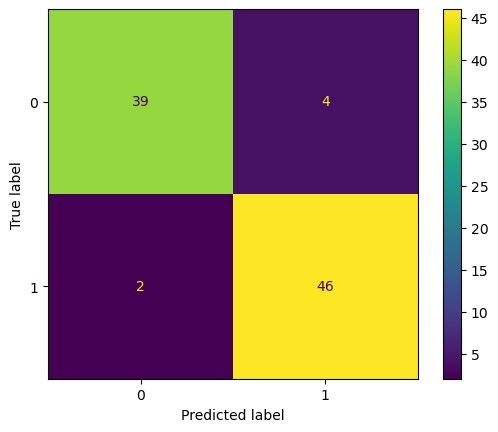

In [800]:
con=confusion_matrix(y_test,pred1,labels=myfit.classes_)
CM=ConfusionMatrixDisplay(con,display_labels=myfit.classes_)
CM.plot()
plt.show()

# KNeighborsClassifier

In [801]:
neigh=KNeighborsClassifier(n_neighbors=5,weights="distance")
myfit1=neigh.fit(x_train,y_train)

In [802]:
pred2=neigh.predict(x_test)

# F1-score of KNeighborsClassifier

In [803]:
score=f1_score(y_test,pred2)
print(f"F1-score : {score}")

F1-score : 0.7047619047619048


# classification_report for KNeighborsClassifier

In [804]:
report2=classification_report(y_test,pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.68      0.53      0.60        43
           1       0.65      0.77      0.70        48

    accuracy                           0.66        91
   macro avg       0.66      0.65      0.65        91
weighted avg       0.66      0.66      0.65        91



# ploting confusion_matrix for KNeighborsClassifier

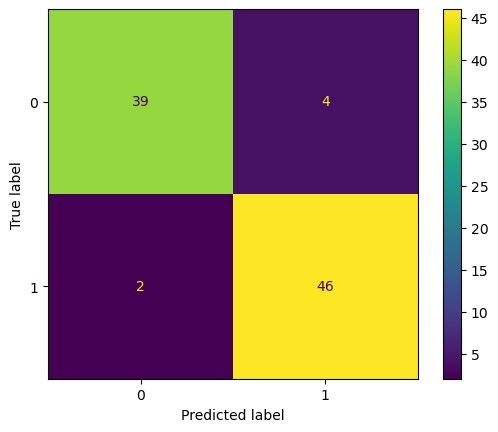

In [805]:
con1=confusion_matrix(y_test,pred2,labels=myfit1.classes_)
CM1=ConfusionMatrixDisplay(con,display_labels=myfit1.classes_)
CM1.plot()
plt.show()

# DecisionTreeClassifier

In [829]:
d_tree=DecisionTreeClassifier(max_depth=9,criterion="entropy",splitter="best")
myfit2=d_tree.fit(x_train,y_train)

In [830]:
pred3=d_tree.predict(x_test)

# F1-score for DecisionTreeClassifier

In [831]:
score=f1_score(y_test,pred3)
print(f"F1-score : {score}")

F1-score : 0.8571428571428572


 # classification_report for DecisionTreeClassifier

In [832]:
report3=classification_report(y_test,pred3)
print(report3)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        43
           1       0.91      0.81      0.86        48

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



 # ploting confusion_matrix for DecisionTreeClassifier

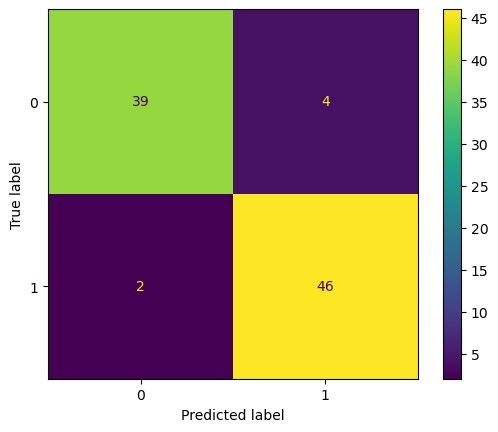

In [833]:
con2=confusion_matrix(y_test,pred3,labels=myfit2.classes_)
CM2=ConfusionMatrixDisplay(con,display_labels=myfit2.classes_)
CM2.plot()
plt.show()

as it is seen Logisticregression had higher accuracy than other algorithms